In [27]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import pandas as pd
import torch
import seaborn as sns

In [28]:
def load_data(REPO_PATH, training_dataset_name):
    # Directory containing CSV files
    training_directory = f'{REPO_PATH}/Embeddings/Training/{training_dataset_name}'
    validation_directory = f'{REPO_PATH}/Embeddings/Validation/{training_dataset_name}'
    testing_directory = f'{REPO_PATH}/Embeddings/Testing'
    country_list = f'{REPO_PATH}/data_finding/country_list_region.csv'
    region_list = f'{REPO_PATH}/data_finding/UNSD_Methodology.csv'

    # Get a list of all filenames in each directory
    training_file_list = [file for file in os.listdir(training_directory)]
    validation_file_list = [file for file in os.listdir(validation_directory)]
    testing_file_list = [file for file in os.listdir(testing_directory)]

    # Initialize an empty list to store DataFrames
    training_dfs = []
    validation_dfs = []
    testing_dfs = []


    # Iterate through the files, read them as DataFrames, and append to the list
    for file in training_file_list:
        file_path = os.path.join(training_directory, file)
        df = pd.read_csv(file_path)
        training_dfs.append(df)
    # Iterate through the files, read them as DataFrames, and append to the list
    for file in validation_file_list:
        file_path = os.path.join(validation_directory, file)
        df = pd.read_csv(file_path)
        validation_dfs.append(df)
    # Iterate through the files, read them as DataFrames, and append to the list
    for file in testing_file_list:
        file_path = os.path.join(testing_directory, file)
        df = pd.read_csv(file_path)
        testing_dfs.append(df)

    # Concatenate all DataFrames in the list into a single DataFrame
    training_combined_df = pd.concat(training_dfs, ignore_index=True)
    validation_combined_df = pd.concat(validation_dfs, ignore_index=True)
    testing_combined_df = pd.concat(testing_dfs, ignore_index=True)

    # map contries to regions
    country_list = pd.read_csv(country_list)
    training_combined_df = pd.merge(training_combined_df, country_list,left_on='label', right_on='Country' )
    print(training_combined_df)
    
    return training_combined_df, validation_combined_df, testing_combined_df

In [29]:
def transform_to_tensor(x):
    model_input_str = eval(x)
    model_input_array = np.frombuffer(model_input_str, dtype=np.float32)
    model_input = model_input_array.tolist()
    return model_input

In [30]:
REPO_PATH = '/home/leon/Documents/GPML/good_practices_ml/'
training_combined_df, validation_combined_df, testing_combined_df = load_data(REPO_PATH, 'Balanced')
#training_combined_df = training_combined_df.sample(10000)

#tsne = TSNE(n_components=3, random_state=0,init='pca')
#tsne_obj= tsne.fit_transform(np.array(training_combined_df["model_input"].apply(transform_to_tensor).tolist())  )


             label  width  height format  \
0      Netherlands   1536     662   JPEG   
1      Netherlands   1536     662   JPEG   
2      Netherlands   1536     662   JPEG   
3      Netherlands   1536     662   JPEG   
4      Netherlands   1536     662   JPEG   
...            ...    ...     ...    ...   
25768   San Marino   1536     662   JPEG   
25769   San Marino   1536     662   JPEG   
25770        Nepal   1536     662   JPEG   
25771   Antarctica   1536     662   JPEG   
25772      Belarus   1536     662   JPEG   

                                                    path  \
0      /share/temp/bjordan/good_practices_in_machine_...   
1      /share/temp/bjordan/good_practices_in_machine_...   
2      /share/temp/bjordan/good_practices_in_machine_...   
3      /share/temp/bjordan/good_practices_in_machine_...   
4      /share/temp/bjordan/good_practices_in_machine_...   
...                                                  ...   
25768  /share/temp/bjordan/good_practices_in_machin

In [31]:
y = training_combined_df['label'].to_numpy()
# Get unique classes
classes = np.unique(y)
print(len(classes))
# Create a color map
#colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))
colors = plt.cm.tab20(np.linspace(0, 1, 20))

20


In [32]:
X = training_combined_df["model_input"].apply(transform_to_tensor).to_list()
y = training_combined_df['label'].to_numpy()
print(type(X[0]))
feat_cols = [ 'pixel'+str(i) for i in range(len(X[0])) ]
X = np.array(X)
X.shape


<class 'list'>


(25773, 723)

In [33]:
tsne = TSNE(n_components=2, verbose=1, init='pca')
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 25773 samples in 0.010s...
[t-SNE] Computed neighbors for 25773 samples in 12.760s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25773
[t-SNE] Computed conditional probabilities for sample 2000 / 25773
[t-SNE] Computed conditional probabilities for sample 3000 / 25773
[t-SNE] Computed conditional probabilities for sample 4000 / 25773
[t-SNE] Computed conditional probabilities for sample 5000 / 25773
[t-SNE] Computed conditional probabilities for sample 6000 / 25773
[t-SNE] Computed conditional probabilities for sample 7000 / 25773
[t-SNE] Computed conditional probabilities for sample 8000 / 25773
[t-SNE] Computed conditional probabilities for sample 9000 / 25773
[t-SNE] Computed conditional probabilities for sample 10000 / 25773
[t-SNE] Computed conditional probabilities for sample 11000 / 25773
[t-SNE] Computed conditional probabilities for sample 12000 / 25773
[t-SNE] Computed conditional probabilities for sa

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

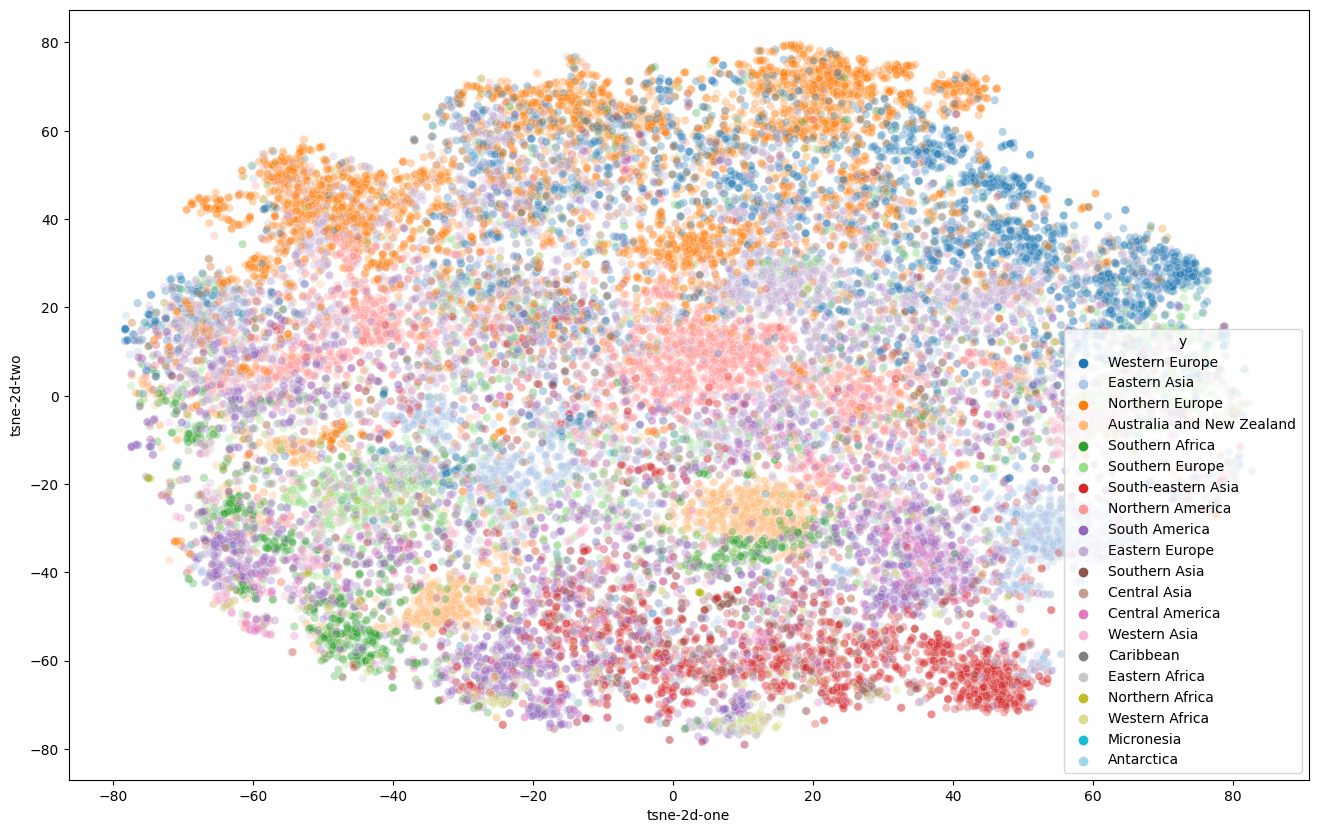

In [37]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = y

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("tab20", 20),
    data=df_subset,
    legend="full",
    alpha=0.3
)